### Классификация цветков ириса с помощью TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
import numpy as np

In [2]:
# Загрузка данных
iris = tfds.load('iris', with_info = False)
iris

{'train': <PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [3]:
# Расщепление данных
tf.random.set_seed(42)
ds_origin = iris['train']
ds_origin = ds_origin.shuffle(150, reshuffle_each_iteration = False)
n_size = 100
ds_train_origin = ds_origin.take(n_size)
ds_test = ds_origin.skip(n_size)

In [4]:
ds_train_origin = ds_train_origin.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

In [5]:
# Построение модели
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'sigmoid', input_shape = (4,)),
    tf.keras.layers.Dense(3, activation = 'softmax')])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Компиляция модели
iris_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
# Обучение модели
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)
ds_train = ds_train_origin.shuffle(buffer_size = training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size = batch_size)
ds_train = ds_train.prefetch(buffer_size = 100)

In [8]:
history = iris_model.fit(ds_train, epochs = num_epochs, steps_per_epoch = steps_per_epoch, verbose = 1)

Epoch 1/200
50/50 [==============================] - 0s 872us/step - loss: 1.1214 - accuracy: 0.3400
Epoch 2/200
50/50 [==============================] - 0s 836us/step - loss: 1.0742 - accuracy: 0.3400
Epoch 3/200
50/50 [==============================] - 0s 854us/step - loss: 1.0378 - accuracy: 0.4900
Epoch 4/200
50/50 [==============================] - 0s 811us/step - loss: 1.0105 - accuracy: 0.5100
Epoch 5/200
50/50 [==============================] - 0s 796us/step - loss: 0.9771 - accuracy: 0.6800
Epoch 6/200
50/50 [==============================] - 0s 809us/step - loss: 0.9400 - accuracy: 0.8100
Epoch 7/200
50/50 [==============================] - 0s 813us/step - loss: 0.9080 - accuracy: 0.8000
Epoch 8/200
50/50 [==============================] - 0s 852us/step - loss: 0.8693 - accuracy: 0.9000
Epoch 9/200
50/50 [==============================] - 0s 995us/step - loss: 0.8379 - accuracy: 0.8200
Epoch 10/200
50/50 [==============================] - 0s 959us/step - loss: 0.8037 - accura

50/50 [==============================] - 0s 797us/step - loss: 0.1965 - accuracy: 0.9900
Epoch 82/200
50/50 [==============================] - 0s 798us/step - loss: 0.1937 - accuracy: 0.9700
Epoch 83/200
50/50 [==============================] - 0s 797us/step - loss: 0.1900 - accuracy: 0.9800
Epoch 84/200
50/50 [==============================] - 0s 807us/step - loss: 0.1856 - accuracy: 0.9800
Epoch 85/200
50/50 [==============================] - 0s 816us/step - loss: 0.1864 - accuracy: 0.9600
Epoch 86/200
50/50 [==============================] - 0s 793us/step - loss: 0.1823 - accuracy: 0.9800
Epoch 87/200
50/50 [==============================] - 0s 844us/step - loss: 0.1816 - accuracy: 0.9800
Epoch 88/200
50/50 [==============================] - 0s 842us/step - loss: 0.1826 - accuracy: 0.9600
Epoch 89/200
50/50 [==============================] - 0s 853us/step - loss: 0.1745 - accuracy: 0.9800
Epoch 90/200
50/50 [==============================] - 0s 851us/step - loss: 0.1724 - accuracy: 

50/50 [==============================] - 0s 799us/step - loss: 0.0944 - accuracy: 0.9600
Epoch 161/200
50/50 [==============================] - 0s 804us/step - loss: 0.0956 - accuracy: 0.9600
Epoch 162/200
50/50 [==============================] - 0s 840us/step - loss: 0.0935 - accuracy: 0.9800
Epoch 163/200
50/50 [==============================] - 0s 823us/step - loss: 0.0932 - accuracy: 0.9800
Epoch 164/200
50/50 [==============================] - 0s 851us/step - loss: 0.0928 - accuracy: 0.9700
Epoch 165/200
50/50 [==============================] - 0s 867us/step - loss: 0.0925 - accuracy: 0.9700
Epoch 166/200
50/50 [==============================] - 0s 905us/step - loss: 0.0918 - accuracy: 0.9800
Epoch 167/200
50/50 [==============================] - 0s 822us/step - loss: 0.0908 - accuracy: 0.9700
Epoch 168/200
50/50 [==============================] - 0s 914us/step - loss: 0.0892 - accuracy: 0.9800
Epoch 169/200
50/50 [==============================] - 0s 803us/step - loss: 0.0888 - a

#### Кривые обучения

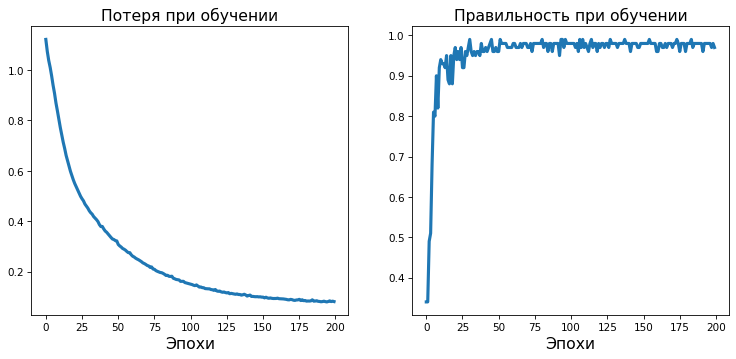

In [9]:
import matplotlib.pyplot as plt
history_data = history.history
fig = plt.figure(figsize = (12, 5), dpi = 75)
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_data['loss'], lw = 3)
ax.set_title('Потеря при обучении', size = 15)
ax.set_xlabel('Эпохи', size = 15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_data['accuracy'], lw = 3)
ax.set_title('Правильность при обучении', size = 15)
ax.set_xlabel('Эпохи', size = 15)
plt.show()

#### Оценка обученной модели на испытательном наборе данных

In [10]:
results = iris_model.evaluate(ds_test.batch(50), verbose = 1)

1/1 [==============================] - 0s 107ms/step - loss: 0.0618 - accuracy: 0.9800


### Еще один вариант построения сети

In [11]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("iris.csv")
df = df.drop(['Id'], axis = 1)
df = shuffle(df)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,5.4,3.7,1.5,0.2,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
...,...,...,...,...,...
52,6.9,3.1,4.9,1.5,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica


In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
lb = LabelEncoder()
lb.fit_transform(df['Species'])

array([0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2,
       1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1])

In [13]:
df['Species'] = lb.fit_transform(df['Species'])
df['Species'] = np_utils.to_categorical(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
10,5.4,3.7,1.5,0.2,0
75,6.6,3.0,4.4,1.4,1
141,6.9,3.1,5.1,2.3,2
18,5.7,3.8,1.7,0.3,0
74,6.4,2.9,4.3,1.3,1
...,...,...,...,...,...
52,6.9,3.1,4.9,1.5,1
109,7.2,3.6,6.1,2.5,2
83,6.0,2.7,5.1,1.6,1
147,6.5,3.0,5.2,2.0,2


In [14]:
from sklearn.model_selection import train_test_split
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df[['Species']].values

In [15]:
# Нормализация данных
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(X))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, shuffle = True)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


In [34]:
iris_model_II = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'sigmoid', input_shape = (4,)),
    tf.keras.layers.Dense(3, activation = 'softmax')])
iris_model_II.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                80        
                                                                 
 dense_52 (Dense)            (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.models import Sequential 
from keras.layers import Dense
input_dim = len(df.columns) - 1

model = Sequential()
model.add(Dense(64, input_dim = input_dim , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(X_train, y_train, epochs = 100, batch_size = 2)
scores = model.evaluate(X_test, y_test)

Epoch 1/100
60/60 [==============================] - 0s 933us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 2/100
60/60 [==============================] - 0s 915us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 3/100
60/60 [==============================] - 0s 840us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 4/100
60/60 [==============================] - 0s 848us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 5/100
60/60 [==============================] - 0s 882us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 6/100
60/60 [==============================] - 0s 844us/step - loss: 0.0000e+00 - accuracy: 0.3167
Epoch 7/100
60/60 [==============================] - 0s 864us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 8/100
60/60 [==============================] - 0s 862us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 9/100
60/60 [==============================] - 0s 845us/step - loss: 0.0000e+00 - accuracy: 0.3083
Epoch 10/100
60/60 [==============================] - 0

60/60 [==============================] - 0s 945us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 79/100
60/60 [==============================] - 0s 927us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 80/100
60/60 [==============================] - 0s 885us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 81/100
60/60 [==============================] - 0s 956us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 82/100
60/60 [==============================] - 0s 900us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 83/100
60/60 [==============================] - 0s 869us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 84/100
60/60 [==============================] - 0s 891us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 85/100
60/60 [==============================] - 0s 950us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 86/100
60/60 [==============================] - 0s 886us/step - loss: 0.0000e+00 - accuracy: 0.3000
Epoch 87/100
60/60 [==============================] - 0s 89

In [32]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 46.67%


In [ ]:
# Линейная модель
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units = 1)
])

In [ ]:
# Сборка модели
linear_model.compile(
    optimizer = tf.optimizers.SGD(learning_rate = 0.01),
    loss = 'mean_absolute_error')

In [ ]:
%%time
history_linear_model = linear_model.fit(X, y, epochs = 100, verbose = 1, validation_split = 0.2)

In [ ]:
np.mean((linear_model.predict(X_test) > 0.5).astype(int) == y_test)

### Построение модели

In [ ]:
seq_model = tf.keras.Sequential()
seq_model.add(normalizer)
seq_model.add(layers.Dense(units = 32, activation = 'relu'))
seq_model.add(layers.Dense(units = 1, activation = 'sigmoid'))
seq_model.compile(optimizer = tf.optimizers.SGD(learning_rate = 0.1), loss = 'mean_absolute_error')
history_seq_model = seq_model.fit(X, y, epochs = 100, verbose = 1, validation_split = 0.2)

In [ ]:
np.mean((seq_model.predict(X_test) > 0.5).astype(int) == y_test)

In [ ]:
seq_model.predict(X_test[4])

In [ ]:
y_test[4]